<h1>Goal:</h1>

In this milestone we are tasked to look at our data and try to understand its structure better. To do this with our NCAA career data we begin to look at the descriptive statistics and basic visualizations. Note this notebook focuses on the aggregated stats over a NCAA player's career, not season by season data which is done in the `ncaa_box_score_data_exploration` notebook.

Begin by importing the needed libraries. Seaborn and matplotlib are used for ploting.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import getpass
import psycopg2
pd.set_option('display.max_columns', 500)
sns.set()
plt.figure(figsize=(12,8));

<Figure size 864x576 with 0 Axes>

Connect to our database.

In [2]:
mypasswd = getpass.getpass()
conn = psycopg2.connect(database = 'cs20_group4',
                              user = 'fhfrf',#replace with pawprint
                              host = 'pgsql.dsa.lan',
                              password = mypasswd)
cursor = conn.cursor()

········


We load in the data from the `ncaa_player_career_stats2` table. Using this function in pandas we are able to load our database table directly into a dataframe. We begin our exploration by looking at the shape and structure of our newly created dataframe. 

In [4]:
data = pd.read_sql_query("""
SELECT
    *
FROM ncaa_player_career_stats2 ncaa
WHERE ncaa.games_played IS NOT NULL
""", con = conn)
print(data.shape)
data.head()

(91364, 56)


,index,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,player_name,points,points_produced,position,season,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,player_season_number,avg_conf_rank
0,0,0.049,20.0,0.006,7.0,NaN,atlantic-sun,NaN,NaN,79.0,0.3,0.573,245.0,0.478,117.0,0.269,66.0,0.697,46.0,29.0,29.0,76.0,845.0,NaN,NaN,33.0,1.9,35.0,NaN,antonio-cool-1,Antonio Cool,327.0,NaN,Forward,2005.0,NaN,24.0,jacksonville,0.473,116.0,0.405,47.0,0.073,112.0,0.592,0.173,58.0,129.0,0.543,70.0,0.190,190.0,2.2,0.104,1.0,25.0
1,1,NaN,41.0,NaN,5.0,NaN,atlantic-sun,NaN,NaN,75.0,-0.1,0.537,349.0,0.458,160.0,0.155,54.0,0.741,40.0,27.0,27.0,76.0,832.0,NaN,NaN,23.0,1.6,35.0,NaN,antonio-cool-1,Antonio Cool,415.0,NaN,Forward,2006.0,NaN,24.0,jacksonville,0.453,158.0,0.348,55.0,NaN,98.0,0.554,0.090,37.0,191.0,0.550,105.0,NaN,190.0,1.5,0.072,2.0,25.0
2,2,0.043,2.0,0.025,2.0,-5.3,atlantic-10,-3.5,0.078,6.0,0.0,0.404,26.0,0.269,7.0,0.154,4.0,0.750,3.0,15.0,0.0,78.0,87.0,-1.8,0.057,5.0,0.0,19.0,4.8,jake-fay-1,Jake Fay,24.0,23.0,Guard,2014.0,0.013,2.0,hartford,0.808,21.0,0.333,7.0,0.067,11.0,0.430,0.152,5.0,5.0,0.000,0.0,0.181,195.0,0.0,0.003,1.0,8.0
3,3,0.079,1.0,0.000,0.0,-24.5,america-east,-5.4,0.052,1.0,0.0,0.000,9.0,0.000,0.0,0.000,0.0,NaN,0.0,10.0,0.0,78.0,22.0,-19.1,0.051,1.0,-0.2,0.0,-16.1,jake-fay-1,Jake Fay,0.0,1.0,Guard,2016.0,0.026,1.0,hartford,0.667,6.0,0.000,0.0,0.051,2.0,0.000,0.182,2.0,3.0,0.000,0.0,0.260,195.0,-0.2,-0.365,2.0,21.0
4,4,0.000,0.0,0.067,1.0,-20.2,america-east,-1.6,0.000,0.0,0.0,0.000,6.0,0.000,0.0,0.000,0.0,NaN,0.0,8.0,0.0,78.0,15.0,-18.7,0.073,1.0,-0.1,0.0,-11.8,jake-fay-1,Jake Fay,0.0,1.0,Guard,2017.0,0.038,1.0,hartford,0.667,4.0,0.000,0.0,0.037,1.0,0.000,0.143,1.0,2.0,0.000,0.0,0.236,195.0,-0.1,-0.308,3.0,21.0


The next step in our exploration journey is to examine what data we have. We look at the sum of null values in each of our columns. We list them by how many rows are missing. We can see that we are missing a lot of the data in our advanced statistics. 

In [5]:
(data.isnull().sum()).sort_values(ascending = False)

offensive_box_plus_minus           48997
box_plus_minus                     48997
defensive_box_plus_minus           48997
player_efficiency_rating           46315
defensive_rebound_percentage       44589
points_produced                    44587
offensive_rebound_percentage       44498
steal_percentage                   44461
usage_percentage                   24299
block_percentage                   24279
total_rebound_percentage           24279
assist_percentage                  24277
three_point_percentage             19158
win_shares_per_40_minutes           9454
minutes_played                      8737
free_throw_percentage               8325
turnover_percentage                 6123
offensive_rebounds                  5942
defensive_rebounds                  5942
games_started                       5387
turnovers                           4751
avg_conf_rank                       4273
personal_fouls                      4072
two_point_percentage                3966
effective_field_

Next let's look when our data is from. We plot the number of players we have in each season. From the graph we can see the majority of our data begins in the 2001 season, with some data dating back to 1993.

In [6]:
colors = []
for year in list(set(data['season'])):
    if(year == 2001):
        colors.append('darkorange')
    else:
        colors.append('cornflowerblue')

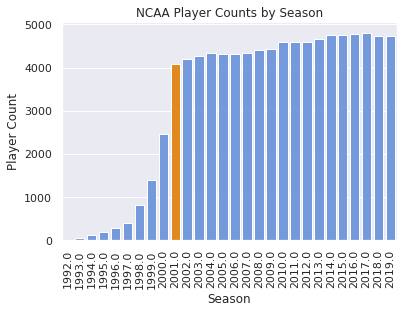

In [7]:
sns.set_style("darkgrid")
sns.barplot(x = 'season',
           y = 'player_id',
            palette = colors,
           data = data.groupby(['season']).player_id.nunique().reset_index())
plt.xticks(rotation = 90)
plt.xlabel('Season')
plt.ylabel('Player Count')
plt.title('NCAA Player Counts by Season');

Next we want to start looking at some our data. The graph below is looking at the average height of players for every season. Based on the previous graph we know that this data is baised with not much data from the 90's. We can see the results of this in there being a downward slope in average height. Once we hit 2001 the heights level out, this is from the amount of players in our data also leveling off. 

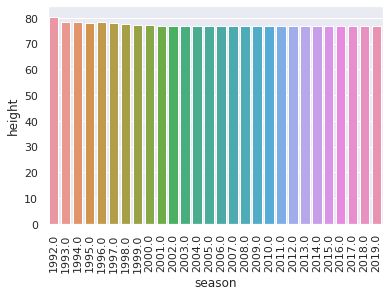

In [8]:
sns.barplot(x = 'season',
            y = 'height',
            data = data.groupby(['season']).height.mean().reset_index())
plt.xticks(rotation = 90);

Now we look at the average weight for a NCAA player. Again, there is high varience with the data before 2001. But we do notice an interesting trend in the data once the full data kicks in. The weight goes down in the seasons following 2001.

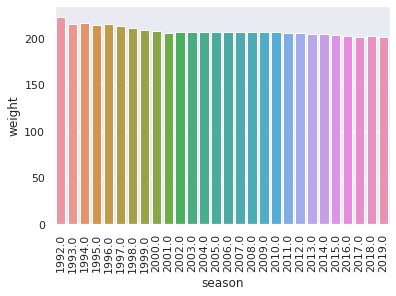

In [9]:
sns.barplot(x = 'season',
            y = 'weight',
            data = data.groupby(['season']).weight.mean().reset_index())
plt.xticks(rotation = 90);

We can explore this a little bit more by creating a height to weight ratio per season. When plotted, we can see the clear trend in the positive direction for height to weight ratio. 

In [9]:
data['height_to_weight'] = data.height / data.weight

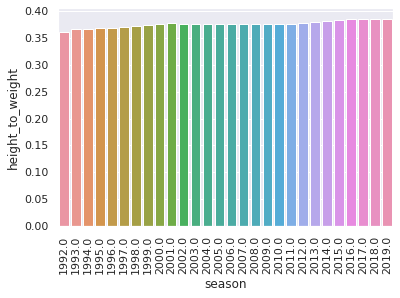

In [11]:
sns.barplot(x = 'season',
           y = 'height_to_weight',
           data = data.groupby(['season']).height_to_weight.mean().reset_index())
plt.xticks(rotation = 90);

We now look back at our advances statistics. We try to find where our data is missing in the early years. 'box_plus_minus', 'player_efficiency_rating', and 'win_shares_per_40_minutes' are much more missing than  'win_shares'. We look at where this is missing in our seasons. 

In [10]:
data[['box_plus_minus', 'player_efficiency_rating', 'win_shares', 'win_shares_per_40_minutes']].isnull().sum()

box_plus_minus               48997
player_efficiency_rating     46315
win_shares                     563
win_shares_per_40_minutes     9454
dtype: int64

In [11]:
data.loc[data.win_shares.isnull()].groupby(['season']).player_id.nunique()

season
1992.0      5
1993.0     40
1994.0    105
1995.0    192
2004.0      1
2005.0      4
2006.0      5
2007.0     17
2008.0     46
2009.0     57
2010.0     90
2014.0      1
Name: player_id, dtype: int64

Next we look at what columns contain numbers. This will allow us to know where to look for statistics.

In [12]:
data.select_dtypes([float, int]).columns

Index(['index', 'assist_percentage', 'assists', 'block_percentage', 'blocks',
       'box_plus_minus', 'defensive_box_plus_minus',
       'defensive_rebound_percentage', 'defensive_rebounds',
       'defensive_win_shares', 'effective_field_goal_percentage',
       'field_goal_attempts', 'field_goal_percentage', 'field_goals',
       'free_throw_attempt_rate', 'free_throw_attempts',
       'free_throw_percentage', 'free_throws', 'games_played', 'games_started',
       'height', 'minutes_played', 'offensive_box_plus_minus',
       'offensive_rebound_percentage', 'offensive_rebounds',
       'offensive_win_shares', 'personal_fouls', 'player_efficiency_rating',
       'points', 'points_produced', 'season', 'steal_percentage', 'steals',
       'three_point_attempt_rate', 'three_point_attempts',
       'three_point_percentage', 'three_pointers', 'total_rebound_percentage',
       'total_rebounds', 'true_shooting_percentage', 'turnover_percentage',
       'turnovers', 'two_point_attempts', 't

Now we begin to create per minute stats. This allows us to evaluate players more effectivly. 

In [13]:
data['assists_per_minute'] = data.assists / data.minutes_played
data['blocks_per_minute'] = data['blocks'] / data.minutes_played
data['drb_per_minute'] = data.defensive_rebounds / data.minutes_played
data['fga_per_minute'] = data.field_goal_attempts / data.minutes_played
data['fg_per_minute'] = data.field_goals / data.minutes_played
data['starting_rate'] = data.games_started / data.games_played
data['points_per_minute'] = data.points / data.minutes_played
data['minutes_per_game'] = data.minutes_played / data.games_played
data['orb_per_minute'] = data.offensive_rebounds / data.minutes_played
data['fouls_per_minute'] = data.personal_fouls / data.minutes_played
data['steals_per_minute'] = data.steals / data.minutes_played
data['3pa_per_minute'] = data.three_point_attempts / data.minutes_played
data['3pm_per_minute'] = data.three_pointers / data.minutes_played
data['rebounds_per_minute'] = data.total_rebounds / data.minutes_played
data['turnovers_per_minute'] = data.turnovers / data.minutes_played
data['2pa_per_minute'] = data.two_point_attempts / data.minutes_played
data['2pm_per_minute'] = data.two_pointers / data.minutes_played

The plot below is a look at how many minutes the players play in their career. We can see a peak at 0, which sadly means that a lot of players never see any playing time in their careers. 

Text(0.5, 1.0, 'NCAA Player Minutes Distribution')

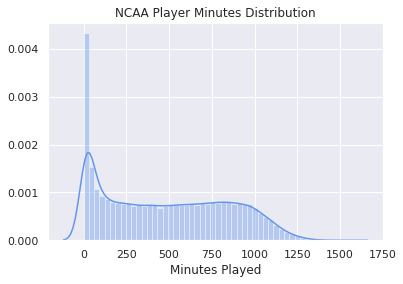

In [32]:
sns.set_style("darkgrid")
fig = sns.distplot(data.minutes_played.dropna(), color = "cornflowerblue");
plt.xlabel('Minutes Played')
plt.title('NCAA Player Minutes Distribution')

We look were our per minute stats are infinite. This is a divide by zero issue in the creation of these columns.

In [18]:
data.loc[data.points_per_minute == np.inf]

,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,player_name,points,points_produced,position,season,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,player_season_number,height_to_weight,assists_per_minute,blocks_per_minute,drb_per_minute,fga_per_minute,fg_per_minute,starting_rate,points_per_minute,minutes_per_game,orb_per_minute,fouls_per_minute,steals_per_minute,3pa_per_minute,3pm_per_minute,rebounds_per_minute,turnovers_per_minute,2pa_per_minute,2pm_per_minute
11685,NaN,0.0,NaN,0.0,-7.2,big-sky,-2.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,1.0,1.0,1.0,1.0,0.0,81.0,0.0,-5.2,NaN,0.0,0.0,0.0,NaN,tanner-morgan-1,Tanner Morgan,1.0,NaN,Forward,2017.0,NaN,0.0,northern-colorado,NaN,0.0,NaN,0.0,NaN,0.0,1.053,0.0,0.0,0.0,NaN,0.0,NaN,230.0,0.0,NaN,2.0,0.352174,NaN,NaN,NaN,NaN,NaN,0.0,inf,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64767,0.0,0.0,NaN,0.0,NaN,big-east,NaN,NaN,0.0,0.0,1.00,1.0,1.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,81.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,tyler-adams-1,Tyler Adams,2.0,NaN,Center,2015.0,NaN,0.0,georgetown,0.0,0.0,NaN,0.0,NaN,0.0,1.000,0.0,0.0,1.0,1.0,1.0,NaN,254.0,0.0,NaN,2.0,0.318898,NaN,NaN,NaN,inf,inf,1.0,inf,0.0,NaN,inf,NaN,NaN,NaN,NaN,NaN,inf,inf
74045,0.0,0.0,NaN,0.0,0.0,wcc,0.1,NaN,0.0,0.0,0.75,2.0,0.5,1.0,0.0,0.0,NaN,0.0,1.0,0.0,81.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,tim-williams-2,Tim Williams,3.0,NaN,Forward,2013.0,NaN,0.0,saint-marys-ca,1.0,2.0,0.5,1.0,NaN,0.0,0.750,0.0,0.0,0.0,NaN,0.0,NaN,235.0,0.0,NaN,4.0,0.344681,NaN,NaN,NaN,inf,inf,0.0,inf,0.0,NaN,NaN,NaN,inf,inf,NaN,NaN,NaN,NaN


Plot the points per minute, and drop were they are infinite or na.

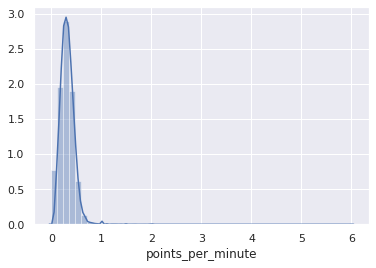

In [19]:
sns.distplot(data.loc[data.points_per_minute != np.inf].points_per_minute.dropna());

We next want to see who scored the most points per minutes when they have played over the median amount of minutes played. This will show us the most efficent scorers. Which is something we can verify with our domain knowledge.

In [20]:
data.loc[data.minutes_played >= data.minutes_played.median()][['player_name', 'season', 'team_abbreviation', 'points_per_minute']].sort_values(by = 'points_per_minute', ascending = False)


,player_name,season,team_abbreviation,points_per_minute
40306,Bubba Wells,1997.0,austin-peay,0.880292
78794,Reggie Williams,2007.0,virginia-military-institute,0.867290
8512,Jason Conley,2002.0,missouri,0.855057
10165,Stephen Curry,2009.0,davidson,0.850655
56080,Michael Beasley,2008.0,kansas-state,0.831892
...,...,...,...,...
75341,Aras Baskauskas,2002.0,california-irvine,0.059581
47514,Brandon Edwards,2006.0,bethune-cookman,0.054432
61657,John Glaser,2003.0,portland-state,0.052854
25904,Patrick McCloskey,2007.0,oakland,0.044000


Look at more descriptive stats on minutes played

In [21]:
data.minutes_played.mean()

483.3630367429927

In [22]:
data.minutes_played.quantile(0.10)

18.0

In [23]:
data.loc[data.starting_rate >= 0.25].minutes_played.median()

781.0

We look at the distrubution of rebounds per minute when the player had played minutes.

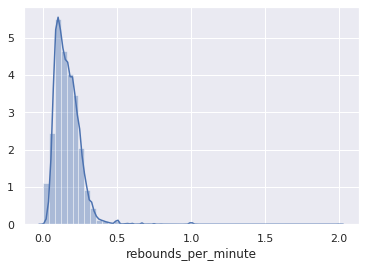

In [24]:
sns.distplot(data.loc[data.rebounds_per_minute != np.inf].rebounds_per_minute.dropna());

We look at the distrubution of feild goal attempts per minute when the player had played minutes.

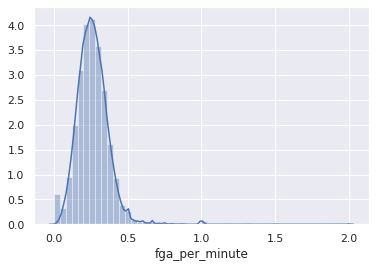

In [25]:
sns.distplot(data.loc[data.fga_per_minute != np.inf].fga_per_minute.dropna(),
            bins = 50);

Finally we look at a correlation plot of all of columns. 

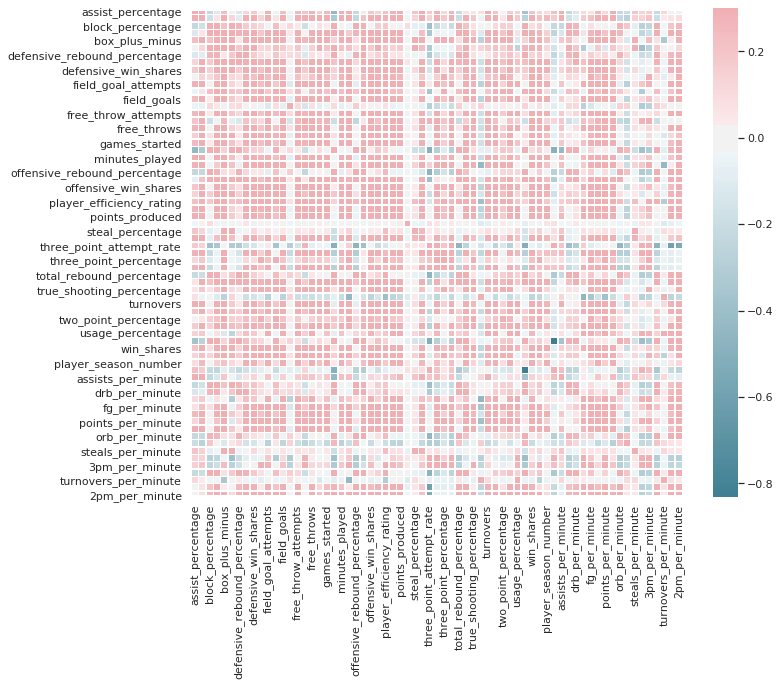

In [26]:
f, ax = plt.subplots(figsize = (11, 9))

sns.heatmap(data.corr(),
           #mask = np.triu(np.ones_like(data.corr(), dtype=np.bool)),
           cmap = sns.diverging_palette(220, 10, as_cmap=True),
           vmax = 0.3,
           center = 0,
           square = True,
           linewidths = 0.5);

And list the correlation values for one of our advanced statistics that tell us the quality of a player, win shares. The most important values are the counting offensive stats. Which is important to note because those values can be inflated if a player plays a lot of minutes. This is why creating the per minute number is important!

In [27]:
data.corr()['win_shares'].sort_values(ascending = False).head(50)[1:50]

offensive_win_shares               0.929831
points_produced                    0.897144
points                             0.882491
field_goals                        0.881319
defensive_win_shares               0.849554
two_pointers                       0.824841
free_throws                        0.824381
field_goal_attempts                0.821304
minutes_played                     0.818974
free_throw_attempts                0.816926
defensive_rebounds                 0.815433
total_rebounds                     0.797124
two_point_attempts                 0.796424
games_started                      0.760963
minutes_per_game                   0.759125
steals                             0.703268
starting_rate                      0.699382
turnovers                          0.697021
personal_fouls                     0.687412
offensive_rebounds                 0.662197
games_played                       0.601876
assists                            0.592169
box_plus_minus                  